In [ ]:
# Imports
import torch
import torchvision # torch package for vision related things
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import DataLoader  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!
import timeit
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

In [ ]:
# Load Training and Test data
train_dataset = datasets.MNIST(root="dataset/", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root="dataset/", train=False, transform=transforms.ToTensor(), download=True)
#train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
#test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)



Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw




Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw




Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
print(type(train_dataset))
print(train_dataset)

<class 'torchvision.datasets.mnist.MNIST'>
Dataset MNIST
    Number of datapoints: 60000
    Root location: dataset/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
for x,y in train_dataset:
  #print(x.shape,y, type(x))
  x = x[:,:,:14]
  #break

In [ ]:
for x,y in train_dataset:
  print(x.shape,y, type(x))
  #x = x[:,:,:14]
  break

torch.Size([1, 28, 28]) 5 <class 'torch.Tensor'>


In [ ]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: dataset/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

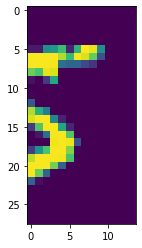

(60000, 28, 14)


In [ ]:
left_imgs = np.zeros((60000,28,14))
right_imgs = np.zeros((60000,28,14))

for idx, img in enumerate(x_train):
  left_imgs[idx] = img[:,:14]
  right_imgs[idx] = img[:,14:]


plt.imshow(right_imgs[0])
plt.show()
print(left_imgs.shape)

### making left and right imgs of 1 image and appending as a tuple in data list

In [ ]:
data = []

for idx, img in enumerate(x_train):
  left = img[:,:14]
  right = img[:,14:]
  data.append((left,right))

data = np.array(data)
print(data.shape)

(60000, 2, 28, 14)


### converting above numpy list of left-right tuples to torch.tensor

In [ ]:
X = torch.tensor(data)
X.shape

torch.Size([60000, 2, 28, 14])

### making data loader for bove tensor

In [ ]:
train_loader = DataLoader(dataset=X, batch_size=64, shuffle=True)


In [ ]:
for x in train_loader:
  print(x.shape)
  x = x.reshape(64,1,2,28,14)
  print(x.shape)
  break

torch.Size([64, 2, 28, 14])
torch.Size([64, 1, 2, 28, 14])


In [ ]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [ ]:
class NN2(nn.Module):
    def __init__(self):
        super().__init__()
        
        
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)  # 8*14*7

        self.conv2 = nn.Conv2d(8, 24, kernel_size=3, stride=1, padding=1)
         
         
        self.pool2 = nn.MaxPool2d(2, 2) # 24*7-7
        self.fc1 = nn.Linear(24*7*3, 64)
        self.fc2 = nn.Linear(64, 10)

    def feed_first_half(self, x):
        print("1", x.shape, x.dtype)
        x = x.long()
        x = F.relu(self.conv1(x))
        print("2")
        x = self.pool1(x)
        print("3")
        x = F.relu(self.conv2(x))
        print("4")
        x = self.pool2(x)
        print("5")
        x = torch.flatten(x)
        print("6") 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

    def feed_left(self, x):
        plt.imshow(x[0,0,:,:])
        plt.show()

    def feed_right(self, x):
        plt.imshow(x[0,0,:,:])
        plt.show()
        
    def forward(self, x):
        #print(x.shape)
        #x = x.type(torch.LongTensor)

        left = x[:,:,0,:,:]#.long()
        right = x[:,:,1,:,:]#.long()
        #print(left.shape, right.shape)
        #print(".........")
        #self.feed_left(left)
        #self.feed_right(right)
        #left_out = self.feed_first_half(left)
        #right_out = self.feed_first_half(right)
        #return left_out, right_out
        #'''
        print("...",left.shape)
        x = F.relu(self.conv1(left))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.reshape(64,-1) 
        print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        y = F.relu(self.conv1(right))
        y = self.pool1(y)
        y = F.relu(self.conv2(y))
        y = self.pool2(y)
        print(y.shape)
        y = y.reshape(64,-1) 
        print(y.shape) 
        y = F.relu(self.fc1(y))
        y = F.relu(self.fc2(y))
        #'''
        return x,y

In [ ]:
a = torch.randn(1,1,28,14)
print(a.dtype)
model = NN2()
out = model(a)
print(out.shape)

torch.float32
torch.Size([1, 24, 14, 7])


### iterating over train  loader and displaying left and right of first image from class above

In [ ]:
model = NN2()
for x in train_loader:
  #print(x.shape)
  x = x.reshape(64,1,2,28,14)
  #print(type(x), x.dtype)
  x = x.float()
  #print( x.dtype)
  l,r = model(x)
  print(l.shape, r.shape)
  break

... torch.Size([64, 1, 28, 14])
torch.Size([64, 504])
torch.Size([64, 24, 7, 3])
torch.Size([64, 504])
torch.Size([64, 10]) torch.Size([64, 10])


In [ ]:
a=torch.hstack((l,r))
a.shape

torch.Size([64, 20])

### Feeding  batch of 64 imgs to left half feed and right half feed b4 the merged middle layer in the network

64 x 10 dimension output for both ;eft and right img batch as we have 64 imgs and embeddings are of size 10 as of now

In [ ]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()        
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)  # 8*14*7
        self.conv2 = nn.Conv2d(8, 24, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2) # 24*7*3
        self.fc1 = nn.Linear(24*7*3, 64)
        self.fc2 = nn.Linear(64, 10)

    def feed_left(self, x):
        plt.imshow(x[0,0,:,:])
        plt.show()

    def feed_right(self, x):
        plt.imshow(x[0,0,:,:])
        plt.show()
        
    def forward(self, x):

        left = x[:,:,0,:,:]
        right = x[:,:,1,:,:]
        #  LEFT FIRST HALF
        x = F.relu(self.conv1(left))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.reshape(64,-1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        # RIGHT FIRST HALF
        y = F.relu(self.conv1(right))
        y = self.pool1(y)
        y = F.relu(self.conv2(y))
        y = self.pool2(y)
        y = y.reshape(64,-1) 
        y = F.relu(self.fc1(y))
        y = F.relu(self.fc2(y))
        return x,y

model = NN()
for x in train_loader:
  x = x.reshape(64,1,2,28,14)
  x = x.float()
  l,r = model(x)
  print(l.shape, r.shape)
  break

torch.Size([64, 10]) torch.Size([64, 10])


In [ ]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()        
        ### ENCODING
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)  # 8*14*7
        self.conv2 = nn.Conv2d(8, 24, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2) # 24*7*3
        self.fc1 = nn.Linear(24*7*3, 64)
        self.fc2 = nn.Linear(64, 10)

        ### DECODING
        


    def feed_left(self, x):
        plt.imshow(x[0,0,:,:])
        plt.show()

    def feed_right(self, x):
        plt.imshow(x[0,0,:,:])
        plt.show()
        
    def forward(self, x):

        left = x[:,:,0,:,:]
        right = x[:,:,1,:,:]
        #  LEFT FIRST HALF
        x = F.relu(self.conv1(left))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.reshape(64,-1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        # RIGHT FIRST HALF
        y = F.relu(self.conv1(right))
        y = self.pool1(y)
        y = F.relu(self.conv2(y))
        y = self.pool2(y)
        y = y.reshape(64,-1) 
        y = F.relu(self.fc1(y))
        y = F.relu(self.fc2(y))
        return x,y

model = NN()
for x in train_loader:
  x = x.reshape(64,1,2,28,14)
  x = x.float()
  l,r = model(x)
  print(l.shape, r.shape)
  break